In [ ]:
import matplotlib.pyplot as plt
import torch
from IPython.core.magics.execution import _format_time

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.pose import convert
from diffdrr.visualization import plot_drr

In [ ]:
subject = load_example_ct()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
rotations = torch.tensor([[0.0, 0.0, 0.0]], device=device)
translations = torch.tensor([[0.0, 850.0, 0.0]], device=device)

pose = convert(
    rotations,
    translations,
    parameterization="euler_angles",
    convention="ZXY",
)

## Siddon's method

Rendering a standard AP view with Siddon's method takes ~26 ms.
This is slower than trilinear interpolation because Siddon's method computes the exact intersection of every cast ray with the voxels in the volume.

In [ ]:
# Initialize the DRR module for generating synthetic X-rays
drr = DRR(
    subject,
    sdd=1020.0,
    height=200,
    delx=2.0,
).to(device)
_ = drr(pose)  # Initialize drr.density

source, target = drr.detector(pose, calibration=None)
source = drr.affine_inverse(source)
target = drr.affine_inverse(target)

24.4 ms ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


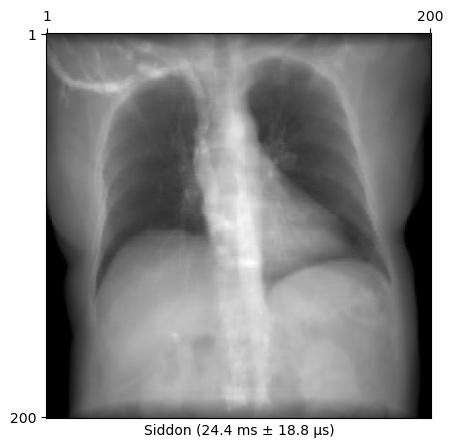

In [ ]:
times = %timeit -o drr.renderer(drr.density, source, target)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose)
plot_drr(img, title=f"Siddon ({time})")
plt.show()

## Trilinear interpolation

Rendering the same view with trilinear interpolation is much faster. The main hyperparameter to control is `n_points`, which is the number of points to sample per ray. The rendering cost of trilinear interpolation is the same as Siddon's method when `n_points` is about 3,500 points.

In [ ]:
drr = DRR(
    subject,
    sdd=1020.0,
    height=200,
    delx=2.0,
    renderer="trilinear",  # Switch the rendering mode
).to(device)

source, target = drr.detector(pose, calibration=None)
_ = drr(pose)  # Initialize drr.density

756 µs ± 3.09 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


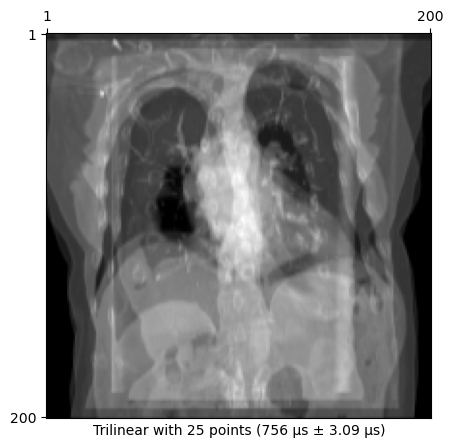

In [ ]:
n_points = 25

times = %timeit -o drr.renderer(drr.density, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

787 µs ± 2.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


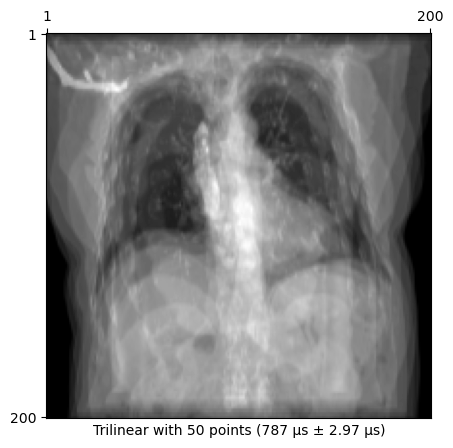

In [ ]:
n_points = 50

times = %timeit -o drr.renderer(drr.density, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

1.12 ms ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


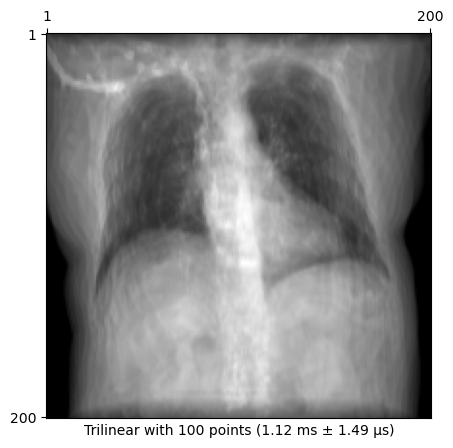

In [ ]:
n_points = 100

times = %timeit -o drr.renderer(drr.density, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

1.81 ms ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


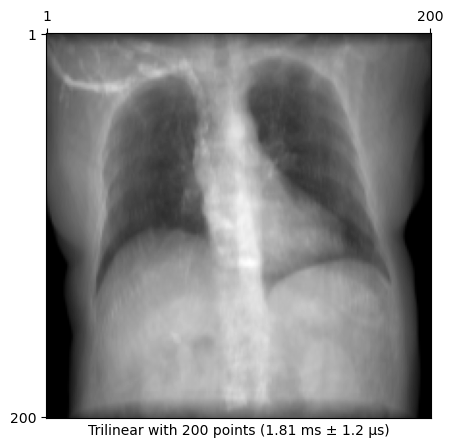

In [ ]:
n_points = 200

times = %timeit -o drr.renderer(drr.density, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

2.2 ms ± 4.46 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


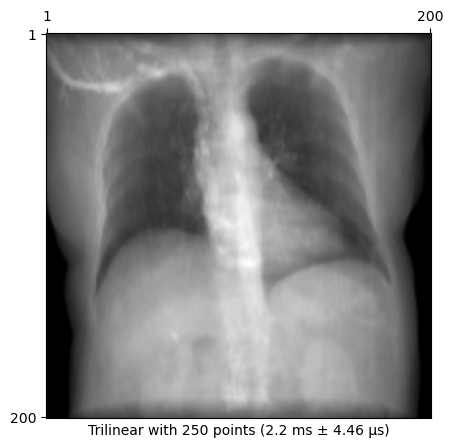

In [ ]:
n_points = 250

times = %timeit -o drr.renderer(drr.density, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

5.15 ms ± 3.94 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


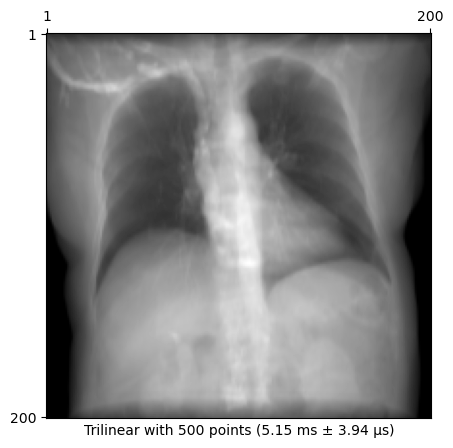

In [ ]:
n_points = 500

times = %timeit -o drr.renderer(drr.density, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

8.29 ms ± 4.65 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


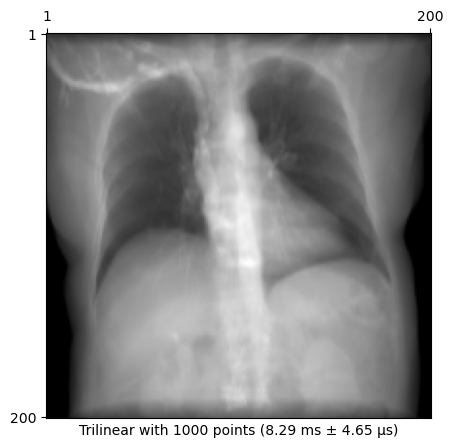

In [ ]:
n_points = 1000

times = %timeit -o drr.renderer(drr.density, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

17.7 ms ± 5.49 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


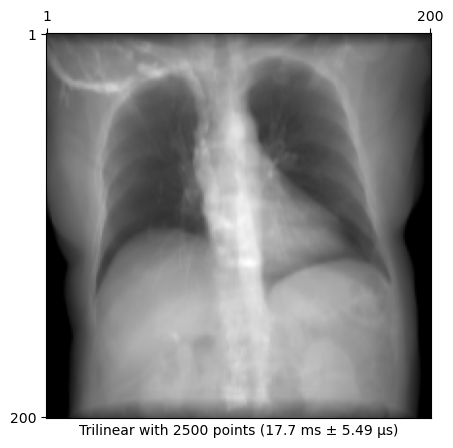

In [ ]:
n_points = 2500

times = %timeit -o drr.renderer(drr.density, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

26 ms ± 6.52 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


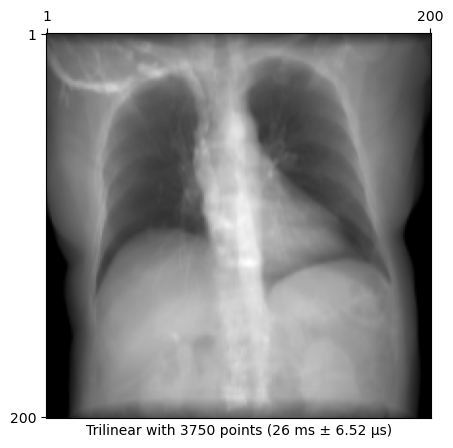

In [ ]:
n_points = 3750

times = %timeit -o drr.renderer(drr.density, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

35.5 ms ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


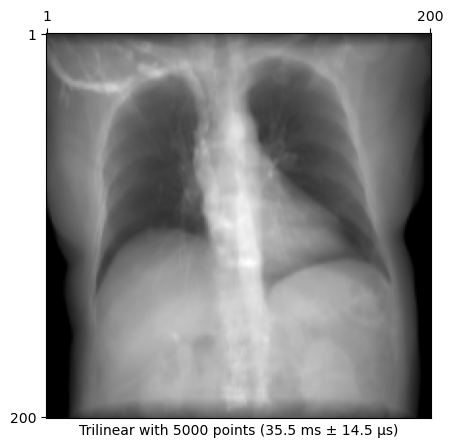

In [ ]:
n_points = 5000

times = %timeit -o drr.renderer(drr.density, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()